In [1]:
import pandas as pd 
import numpy as np
import os 
import requests
import urllib
import ssl

In [2]:
#import libraries
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import os 
import requests
import urllib
import ssl
from sklearn.model_selection import train_test_split
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import keras
from tqdm import tqdm
import pickle
from keras.models import Model
import keras.backend as K
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import itertools
from keras.models import load_model
from sklearn.utils import shuffle
from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig
import tensorflow_text as text

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

/home/fdf7gn/.local/lib/python3.8/site-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import splitfolders

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [2]:
acc_df = pd.read_csv('accredited_images.csv')
unacc_df = pd.read_csv('unaccredited_images.csv')

In [3]:
acc_df.head()

,Unnamed: 0,image_urls
0,0,https://acariahealth.envolvehealth.com/content...
1,1,https://acariahealth.envolvehealth.com/content...
2,2,https://acariahealth.envolvehealth.com/content...
3,3,https://acariahealth.envolvehealth.com/content...
4,4,https://acariahealth.envolvehealth.com/content...


In [4]:
## removes spaces and other inconsistencies in the unaccredited urls 

unacc_df['image_urls'] = unacc_df['image_urls'].str.replace(' ', '')
unacc_df['image_urls'] = unacc_df['image_urls'].str.replace('.md..', '.md.')

In [5]:
unacc_df

,Unnamed: 0,image_urls
0,0,https://static.wixstatic.com/media/3e04e6_80c2...
1,1,https://static.wixstatic.com/media/3e04e6_f842...
2,2,https://static.wixstatic.com/media/3e04e6_d015...
3,3,https://static.wixstatic.com/media/3e04e6_732c...
4,4,https://static.wixstatic.com/media/40120c_f196...
...,...,...
734,734,https://drugsforhealth.org/images/i_bitcoin.png
735,735,https://drugsforhealth.org/themes/theme1/img/b...
736,736,https://buyamoxicillinnorx.comAmoxicillin.jpg
737,737,https://buyazithromycinnorx.comAzithromycin.jpg


In [6]:
acc_list = acc_df['image_urls'].tolist()
unacc_list = unacc_df['image_urls'].tolist()

In [2]:
def sort_urls(raw_links_list):
    url_list = []
    bad_urls = []
    for each in raw_links_list:
        try:
            headers = {'user-agent': 'ds6050 (vkb6bn@virginia.edu)'}
            results = requests.get(each, headers=headers, timeout=2.0)
        except requests.exceptions.RequestException as e:
            #print('Bad URL: ' + each)
            bad_urls.append(each)
            continue
        #print(results)
        #print(each) 
        if results.status_code == 200:
            url_list.append(each)
    return url_list, bad_urls

In [8]:
acc_img_urls, acc_img_bad = sort_urls(acc_list)

In [ ]:
# acc_img_urls

In [9]:
unacc_img_urls, unacc_img_bad = sort_urls(unacc_list)

Create directory of folders

** ONLY RUN ONCE

In [10]:
try: 
    os.mkdir('images')
    os.chdir('images')
    
    os.mkdir('accredited')
    os.chdir('accredited')

    path = os.getcwd()
    parent = os.path.dirname(path)
    new_path = os.chdir(parent)
    # print(new_path)
    
    os.mkdir('unaccredited')
    print('Directory created')
    
except:
    pass

Directory created


In [11]:
acc_path = './accredited/'
unacc_path = './unaccredited/'   

In [3]:
os.getcwd()

'/sfs/qumulo/qhome/fdf7gn'

In [13]:
# make sure path opens the accredited folder, change if needed
os.chdir(acc_path)

In [14]:
def download_images(images):
    ssl._create_default_https_context = ssl._create_unverified_context # bypasses SSL errors
    icount=1
    for each in images:
        try:
            if each.endswith('.jpg'):
                urllib.request.urlretrieve(each, f'pic_{str(icount)}.jpg')
            icount += 1
            if each.endswith('.png'):
                urllib.request.urlretrieve(each, f'pic_{str(icount)}.png')
            icount += 1
        except urllib.error.HTTPError as he:
           # print(he.code)
            continue
        except urllib.error.SSLCertVerificationError as ue:
           # print(ue.code)
            continue
    return icount

** realized the icount is wrong bc it counts every pic whether it downloads or not, not sure how to fix this

In [15]:
download_images(acc_img_urls)

814

should have 394 images in acc folder

In [16]:
path = os.getcwd()
parent = os.path.dirname(path)
new_path = os.chdir(parent)

In [17]:
new_path

In [18]:
os.chdir(unacc_path)

In [19]:
os.getcwd()

'/sfs/qumulo/qhome/fdf7gn/images/unaccredited'

In [20]:
download_images(unacc_img_urls)

842

should have 406 images in unacc folder

In [22]:
!pip install split-folders

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 60.9 MB 14.4 MB/s eta 0:00:01


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import splitfolders

In [86]:
os.chdir('/sfs/qumulo/qhome/fdf7gn/images/')

In [35]:
os.getcwd()

'/sfs/qumulo/qhome/fdf7gn'

In [138]:

splitfolders.ratio('/sfs/qumulo/qhome/fdf7gn/images', output="split", seed=123, ratio=(.8, 0.1,0.1)) 

Copying files: 794 files [00:06, 123.09 files/s]


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [6]:
labels = ['accredited', 'unaccredited']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [93]:
train = get_data('/sfs/qumulo/qhome/fdf7gn/images/split/train')
val = get_data('/sfs/qumulo/qhome/fdf7gn/images/split/test')

<ipython-input-6-8c9aff821d98>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

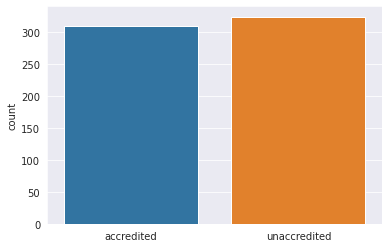

In [76]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("accredited")
    else:
        l.append("unaccredited")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'accredited')

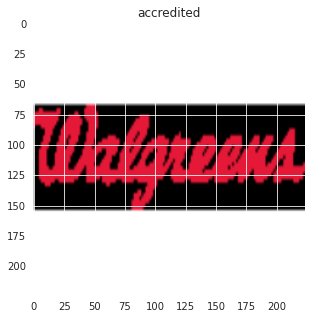

In [26]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'unaccredited')

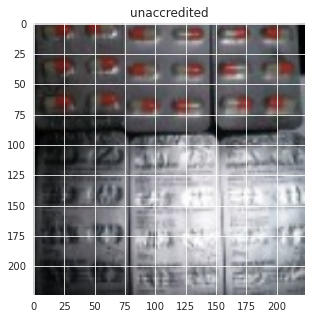

In [27]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [94]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [95]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [96]:
base_model.trainable = False

In [97]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(18, activation="softmax")                                     
                                ])

In [32]:
base_learning_rate = 0.00012
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25
20/20 [==============================] - 5s 136ms/step - loss: 1.3458 - accuracy: 0.4495 - val_loss: 0.6077 - val_accuracy: 0.6585
Epoch 2/25
20/20 [==============================] - 2s 100ms/step - loss: 0.5001 - accuracy: 0.7950 - val_loss: 0.4614 - val_accuracy: 0.7805
Epoch 3/25
20/20 [==============================] - 2s 102ms/step - loss: 0.4103 - accuracy: 0.8013 - val_loss: 0.4478 - val_accuracy: 0.8537
Epoch 4/25
20/20 [==============================] - 2s 100ms/step - loss: 0.3616 - accuracy: 0.8470 - val_loss: 0.3784 - val_accuracy: 0.8415
Epoch 5/25
20/20 [==============================] - 2s 102ms/step - loss: 0.3310 - accuracy: 0.8549 - val_loss: 0.3753 - val_accuracy: 0.8537
Epoch 6/25
20/20 [==============================] - 2s 100ms/step - loss: 0.2705 - accuracy: 0.9117 - val_loss: 0.3646 - val_accuracy: 0.8780
Epoch 7/25
20/20 [==============================] - 2s 98ms/step - loss: 0.2731 - accuracy: 0.8896 - val_loss: 0.3215 - val_accuracy: 0.8659
Epoch 8

In [33]:
model.evaluate(x=x_val, y=y_val)

3/3 [==============================] - 0s 71ms/step - loss: 0.2942 - accuracy: 0.8902


[0.2941543161869049, 0.8902438879013062]

In [34]:
mobilenet_adam_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 71ms/step - loss: 0.2942 - accuracy: 0.8902


In [35]:
mobilenet_adam_acc

0.8902438879013062

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [37]:
y_pred=model.predict(x_val)
y_pred=np.argmax(y_pred,axis=1)

3/3 [==============================] - 1s 74ms/step


In [38]:
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        47
           1       0.81      0.97      0.88        35

    accuracy                           0.89        82
   macro avg       0.89      0.90      0.89        82
weighted avg       0.90      0.89      0.89        82



In [39]:
print(confusion_matrix(y_pred,y_val))

[[39  8]
 [ 1 34]]


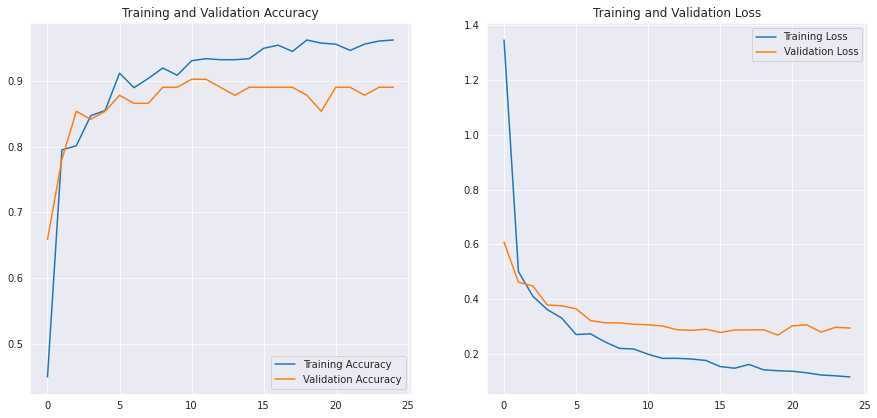

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
base_learning_rate = 0.00012
model.compile(optimizer=tf.keras.optimizers.Adamax(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25
20/20 [==============================] - 5s 140ms/step - loss: 1.4725 - accuracy: 0.4416 - val_loss: 0.6838 - val_accuracy: 0.6707
Epoch 2/25
20/20 [==============================] - 2s 101ms/step - loss: 0.6168 - accuracy: 0.6877 - val_loss: 0.5378 - val_accuracy: 0.8049
Epoch 3/25
20/20 [==============================] - 2s 101ms/step - loss: 0.4757 - accuracy: 0.7713 - val_loss: 0.4738 - val_accuracy: 0.8171
Epoch 4/25
20/20 [==============================] - 2s 102ms/step - loss: 0.4384 - accuracy: 0.8076 - val_loss: 0.4556 - val_accuracy: 0.8293
Epoch 5/25
20/20 [==============================] - 2s 104ms/step - loss: 0.4058 - accuracy: 0.8170 - val_loss: 0.4378 - val_accuracy: 0.8293
Epoch 6/25
20/20 [==============================] - 2s 100ms/step - loss: 0.3967 - accuracy: 0.8265 - val_loss: 0.4196 - val_accuracy: 0.8415
Epoch 7/25
20/20 [==============================] - 2s 101ms/step - loss: 0.3789 - accuracy: 0.8423 - val_loss: 0.4100 - val_accuracy: 0.8415
Epoch 

In [50]:
mobilenet_adamax_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 71ms/step - loss: 0.3031 - accuracy: 0.8659


In [51]:
mobilenet_adamax_acc

0.8658536672592163

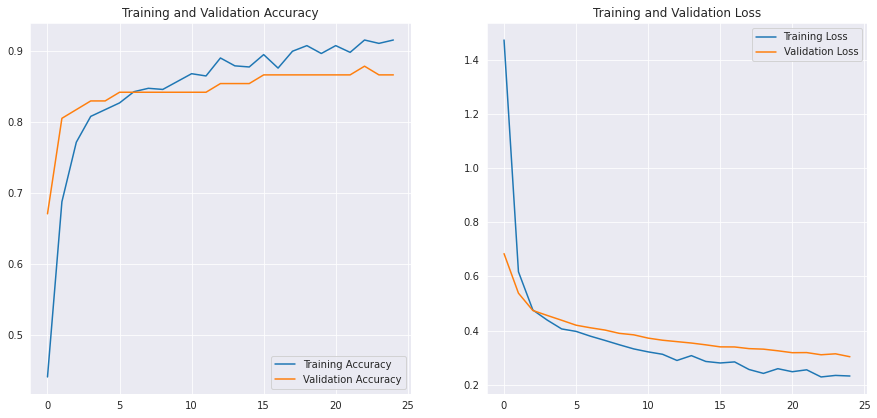

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
base_learning_rate = 0.00012
model.compile(optimizer=tf.keras.optimizers.Adagrad(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25
20/20 [==============================] - 5s 135ms/step - loss: 2.0093 - accuracy: 0.3628 - val_loss: 1.1900 - val_accuracy: 0.6220
Epoch 2/25
20/20 [==============================] - 2s 100ms/step - loss: 1.2161 - accuracy: 0.5379 - val_loss: 0.8648 - val_accuracy: 0.6829
Epoch 3/25
20/20 [==============================] - 2s 100ms/step - loss: 0.9312 - accuracy: 0.6356 - val_loss: 0.7281 - val_accuracy: 0.6951
Epoch 4/25
20/20 [==============================] - 2s 100ms/step - loss: 0.8044 - accuracy: 0.6972 - val_loss: 0.6471 - val_accuracy: 0.7439
Epoch 5/25
20/20 [==============================] - 2s 102ms/step - loss: 0.7575 - accuracy: 0.7050 - val_loss: 0.5917 - val_accuracy: 0.7561
Epoch 6/25
20/20 [==============================] - 2s 98ms/step - loss: 0.6594 - accuracy: 0.7240 - val_loss: 0.5541 - val_accuracy: 0.7439
Epoch 7/25
20/20 [==============================] - 2s 98ms/step - loss: 0.6517 - accuracy: 0.7334 - val_loss: 0.5234 - val_accuracy: 0.7561
Epoch 8/

In [60]:
mobilenet_adagrad_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 70ms/step - loss: 0.3762 - accuracy: 0.8780


In [70]:
mobilenet_adagrad_acc

0.8780487775802612

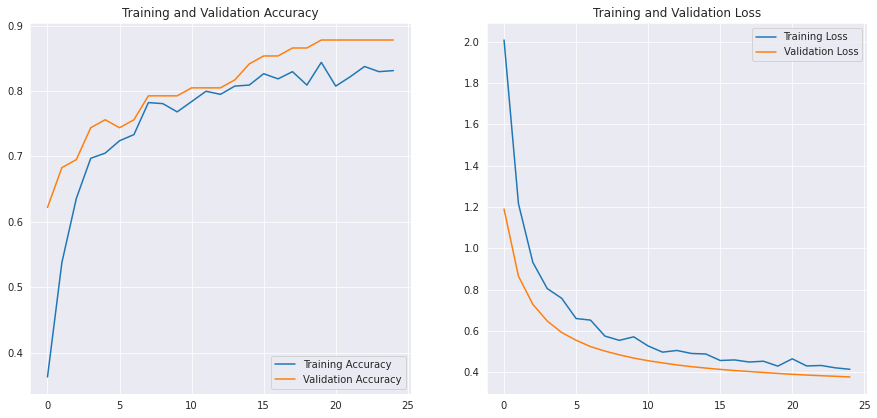

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [69]:
base_learning_rate = 0.00012
model.compile(optimizer=tf.keras.optimizers.Nadam(lr=base_learning_rate, beta_1=0.9, beta_2=0.999),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25
20/20 [==============================] - 6s 137ms/step - loss: 1.3059 - accuracy: 0.4890 - val_loss: 0.5224 - val_accuracy: 0.7805
Epoch 2/25
20/20 [==============================] - 2s 102ms/step - loss: 0.5135 - accuracy: 0.7555 - val_loss: 0.3956 - val_accuracy: 0.8171
Epoch 3/25
20/20 [==============================] - 2s 100ms/step - loss: 0.3847 - accuracy: 0.8407 - val_loss: 0.3766 - val_accuracy: 0.8659
Epoch 4/25
20/20 [==============================] - 2s 103ms/step - loss: 0.3598 - accuracy: 0.8423 - val_loss: 0.3496 - val_accuracy: 0.8659
Epoch 5/25
20/20 [==============================] - 2s 103ms/step - loss: 0.3217 - accuracy: 0.8691 - val_loss: 0.3376 - val_accuracy: 0.8659
Epoch 6/25
20/20 [==============================] - 2s 102ms/step - loss: 0.2780 - accuracy: 0.8833 - val_loss: 0.3417 - val_accuracy: 0.8780
Epoch 7/25
20/20 [==============================] - 2s 100ms/step - loss: 0.2738 - accuracy: 0.8896 - val_loss: 0.3168 - val_accuracy: 0.8659
Epoch 

In [72]:
mobilenet_nadam_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 71ms/step - loss: 0.2920 - accuracy: 0.8780


In [73]:
mobilenet_nadam_acc

0.8780487775802612

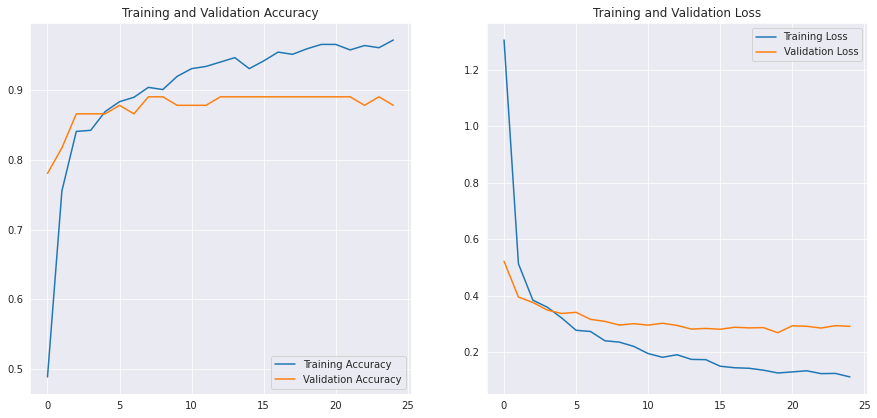

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
base_learning_rate = 0.00012
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate, rho=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25
20/20 [==============================] - 5s 136ms/step - loss: 0.8540 - accuracy: 0.6404 - val_loss: 0.4389 - val_accuracy: 0.8171
Epoch 2/25
20/20 [==============================] - 2s 100ms/step - loss: 0.4284 - accuracy: 0.8202 - val_loss: 0.3771 - val_accuracy: 0.8415
Epoch 3/25
20/20 [==============================] - 2s 102ms/step - loss: 0.3397 - accuracy: 0.8628 - val_loss: 0.3628 - val_accuracy: 0.8537
Epoch 4/25
20/20 [==============================] - 2s 102ms/step - loss: 0.3193 - accuracy: 0.8691 - val_loss: 0.3298 - val_accuracy: 0.8537
Epoch 5/25
20/20 [==============================] - 2s 100ms/step - loss: 0.2743 - accuracy: 0.8975 - val_loss: 0.3186 - val_accuracy: 0.8659
Epoch 6/25
20/20 [==============================] - 2s 100ms/step - loss: 0.2479 - accuracy: 0.8991 - val_loss: 0.3382 - val_accuracy: 0.8780
Epoch 7/25
20/20 [==============================] - 2s 99ms/step - loss: 0.2351 - accuracy: 0.9132 - val_loss: 0.2974 - val_accuracy: 0.8415
Epoch 8

In [82]:
mobilenet_rms_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 73ms/step - loss: 0.3055 - accuracy: 0.8780


In [83]:
mobilenet_rms_acc

0.8780487775802612

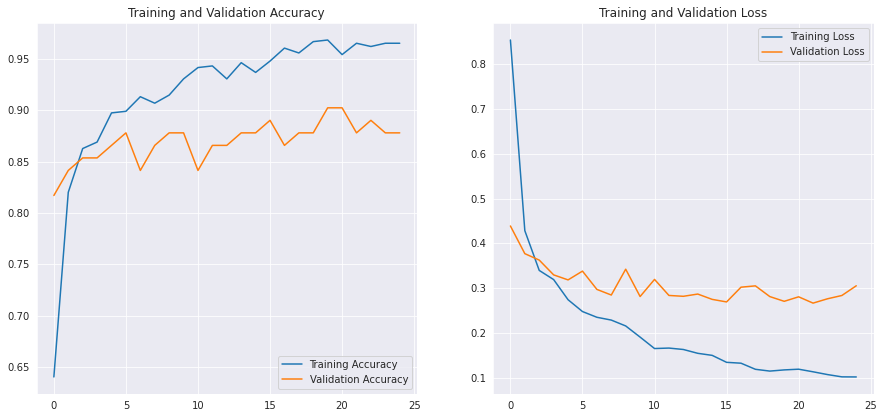

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [90]:
base_learning_rate = 0.00012
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25
20/20 [==============================] - 6s 140ms/step - loss: 0.8781 - accuracy: 0.7114 - val_loss: 0.6383 - val_accuracy: 0.8659
Epoch 2/25
20/20 [==============================] - 2s 100ms/step - loss: 0.3714 - accuracy: 0.8738 - val_loss: 0.3027 - val_accuracy: 0.8293
Epoch 3/25
20/20 [==============================] - 2s 101ms/step - loss: 0.3016 - accuracy: 0.8864 - val_loss: 0.2613 - val_accuracy: 0.8659
Epoch 4/25
20/20 [==============================] - 2s 99ms/step - loss: 0.2286 - accuracy: 0.9164 - val_loss: 0.2606 - val_accuracy: 0.8902
Epoch 5/25
20/20 [==============================] - 2s 102ms/step - loss: 0.1562 - accuracy: 0.9401 - val_loss: 0.2477 - val_accuracy: 0.8659
Epoch 6/25
20/20 [==============================] - 2s 100ms/step - loss: 0.1229 - accuracy: 0.9543 - val_loss: 0.3216 - val_accuracy: 0.9024
Epoch 7/25
20/20 [==============================] - 2s 100ms/step - loss: 0.1531 - accuracy: 0.9416 - val_loss: 0.3123 - val_accuracy: 0.8659
Epoch 8

In [91]:
mobilenet_mom_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 69ms/step - loss: 0.3762 - accuracy: 0.8415


In [92]:
mobilenet_mom_acc

0.8414633870124817

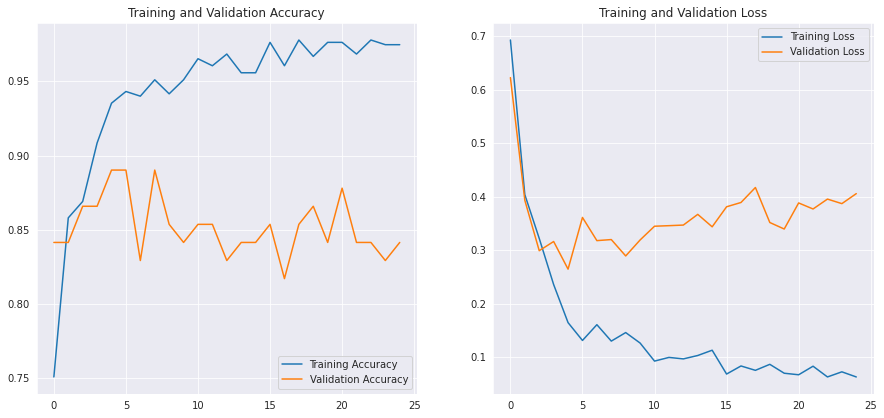

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [98]:
base_learning_rate = 0.00012
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 25 , validation_data = (x_val, y_val))

Epoch 1/25
20/20 [==============================] - 5s 134ms/step - loss: 0.7030 - accuracy: 0.7492 - val_loss: 0.4178 - val_accuracy: 0.8415
Epoch 2/25
20/20 [==============================] - 2s 100ms/step - loss: 0.3133 - accuracy: 0.8833 - val_loss: 0.2918 - val_accuracy: 0.8415
Epoch 3/25
20/20 [==============================] - 2s 102ms/step - loss: 0.2249 - accuracy: 0.9227 - val_loss: 0.2757 - val_accuracy: 0.8415
Epoch 4/25
20/20 [==============================] - 2s 100ms/step - loss: 0.1924 - accuracy: 0.9211 - val_loss: 0.2744 - val_accuracy: 0.8537
Epoch 5/25
20/20 [==============================] - 2s 99ms/step - loss: 0.1627 - accuracy: 0.9274 - val_loss: 0.2853 - val_accuracy: 0.8659
Epoch 6/25
20/20 [==============================] - 2s 99ms/step - loss: 0.1384 - accuracy: 0.9527 - val_loss: 0.2942 - val_accuracy: 0.8902
Epoch 7/25
20/20 [==============================] - 2s 98ms/step - loss: 0.1371 - accuracy: 0.9495 - val_loss: 0.3055 - val_accuracy: 0.8293
Epoch 8/2

In [99]:
mobilenet_nestrov_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 69ms/step - loss: 0.3765 - accuracy: 0.8537


In [100]:
mobilenet_nestrov_acc

0.8536585569381714

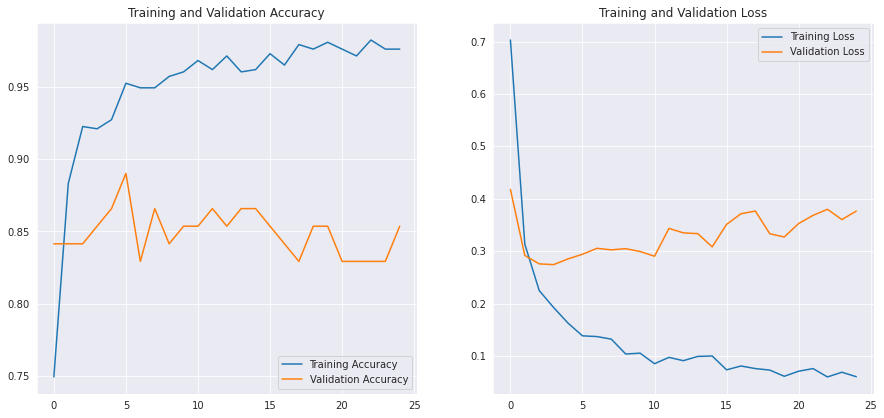

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [114]:
data = [['Adam', mobilenet_adam_acc], ['AdaGrad', mobilenet_adagrad_acc], ['Adamax', mobilenet_adamax_acc],['NAdam', mobilenet_nadam_acc],['RMSProp', mobilenet_rms_acc],
        ['Momentum', mobilenet_mom_acc],['Nestrov', mobilenet_nestrov_acc]  ]
df = pd.DataFrame(data, columns=['Optimizer', 'Accuracy'])
df.sort_values(by=['Accuracy'], ascending=False)

,Optimizer,Accuracy
0,Adam,0.890244
1,AdaGrad,0.878049
3,NAdam,0.878049
4,RMSProp,0.878049
2,Adamax,0.865854
6,Nestrov,0.853659
5,Momentum,0.841463


In [120]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[224, 224, 3]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

s = 20 * len(x_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.Adam(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(x_train,y_train, epochs=n_epochs,
                    validation_data=(x_val, y_val))

Epoch 1/25
20/20 [==============================] - 2s 66ms/step - loss: 967.3042 - accuracy: 0.4779 - val_loss: 154.2574 - val_accuracy: 0.4878
Epoch 2/25
20/20 [==============================] - 1s 57ms/step - loss: 56.5013 - accuracy: 0.4921 - val_loss: 55.1561 - val_accuracy: 0.5488
Epoch 3/25
20/20 [==============================] - 1s 56ms/step - loss: 46.9119 - accuracy: 0.5647 - val_loss: 27.1960 - val_accuracy: 0.4878
Epoch 4/25
20/20 [==============================] - 1s 57ms/step - loss: 26.5192 - accuracy: 0.5804 - val_loss: 24.4980 - val_accuracy: 0.5000
Epoch 5/25
20/20 [==============================] - 1s 56ms/step - loss: 9.7042 - accuracy: 0.6136 - val_loss: 10.2011 - val_accuracy: 0.5976
Epoch 6/25
20/20 [==============================] - 1s 56ms/step - loss: 13.9402 - accuracy: 0.5868 - val_loss: 19.3281 - val_accuracy: 0.5854
Epoch 7/25
20/20 [==============================] - 1s 57ms/step - loss: 12.1699 - accuracy: 0.5978 - val_loss: 4.5429 - val_accuracy: 0.5976

In [124]:
n_steps = n_epochs * len(x_train) // 32
steps = np.arange(n_steps)
lrs = learning_rate * 0.1**(steps / s)

TypeError: unsupported operand type(s) for *: 'ExponentialDecay' and 'float'

In [121]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

NameError: name 'steps' is not defined

In [117]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay